# Data Analysis



In [ ]:
df_normal_data_analysis = df_copy.copy()
df_fault_data_analysis = df_copy.copy()

In [ ]:
normal_current = df_normal_data_analysis['Normal']

chunk_size = 2000
chunks = [normal_current[i:i + chunk_size] for i in range(1, len(normal_current), chunk_size)]

In [ ]:
def chunk_data(excel_data ,nodes, chunk_idx):
        for node_idx, node in enumerate(nodes):
            excel_data.append({
                "Chunk": chunk_idx + 1,
                "Node": node.path,
                "Data": node.data.tolist()
              })

In [ ]:
def create_exceldata(n, excel_data):

    for chunk_idx, chunk in enumerate(chunks):
        wavelet_packet = pywt.WaveletPacket(data=chunk, wavelet='db4', mode='symmetric', maxlevel=3)
        counter = 1
        while (counter <= n):
            nodes = wavelet_packet.get_level(counter, 'freq')
            chunk_data(excel_data ,nodes , chunk_idx)
            counter = counter+1

In [ ]:
def create_dataframe(m):
    excel_data = []

    create_exceldata(m, excel_data)
    df = pd.DataFrame(excel_data)
    return df

In [ ]:
data = create_dataframe(3).explode("Data")
data.head(50000)

,Chunk,Node,Data
0,1,a,229.100576
0,1,a,229.583638
0,1,a,229.83959
0,1,a,229.738609
0,1,a,229.367732
...,...,...,...
113,9,d,-0.000005
113,9,d,-0.000005
113,9,d,-0.000005
113,9,d,-0.000005


In [ ]:
def total_levels(n):
    sum = 0
    while(n>=1):
        sum = sum + pow(2,n)
        n = n-1
    return sum

total_levels_in_a_chunk = total_levels(level)

In [ ]:
def generate_strings(n):
    patterns = []

    def backtrack(current_pattern, lvl):
        if len(current_pattern) == lvl:
            patterns.append(current_pattern)
            return

        backtrack("a" + current_pattern, lvl)
        backtrack("d" + current_pattern, lvl)

    backtrack("", n)  # Use n here, not a fixed 3
    return patterns

def generate_patterns(n):
    a = 1
    res = []
    while(n>=a):
        str = generate_strings(a)
        a = a+1

        res= res+str

    return res


patterns = generate_patterns(level)
patterns

['a',
 'd',
 'aa',
 'da',
 'ad',
 'dd',
 'aaa',
 'daa',
 'ada',
 'dda',
 'aad',
 'dad',
 'add',
 'ddd']

In [ ]:
def give_current_stats(data_frame, no_of_chunks, patterns):
    kurtosis = []
    # this loop will traverse through all of the chunk 1 -> 200
    for i in range(1, int(no_of_chunks) + 1):
        data_of_each_chunk = data_frame[data_frame["Chunk"] == i]
        # this loop will traverse through all the levels of a particular chunk
        for j in range(0, total_levels_in_a_chunk):
            data_for_each_pattern = data_of_each_chunk[data_of_each_chunk["Node"] == patterns[j]]

            kurtosis_val = data_for_each_pattern["Data"].kurt()

            summary_stats = {
                "Chunk": i,
                "Node": patterns[j],
                "kurtosis": kurtosis_val,
            }

            kurtosis.append(summary_stats)

    return kurtosis

In [ ]:
res_normal = give_current_stats(data , 200 , patterns)

In [ ]:
res_normal_analysis =  pd.DataFrame(res_normal , columns=['Chunk', 'Node', 'kurtosis'])

In [ ]:
res_normal_analysis.head(20)

,Chunk,Node,kurtosis
0,1,a,-1.503006
1,1,d,247.984633
2,1,aa,-1.507871
3,1,da,152.250147
4,1,ad,127.889519
5,1,dd,139.334089
6,1,aaa,-1.516947
7,1,daa,61.244343
8,1,ada,192.131271
9,1,dda,79.996029


In [ ]:
fault_current = df_fault_data_analysis['Fault']

chunk_size = 2000
chunks = [fault_current[i:i + chunk_size] for i in range(1, len(fault_current), chunk_size)]

In [ ]:
data = create_dataframe(3).explode("Data")
data.head(50000)

,Chunk,Node,Data
0,1,a,229.237463
0,1,a,229.75024
0,1,a,229.836764
0,1,a,229.863545
0,1,a,229.490478
...,...,...,...
113,9,d,0.00043
113,9,d,-0.000504
113,9,d,-0.001127
113,9,d,-0.000952


In [ ]:
res_faults = give_current_stats(data , 200 , patterns)

In [ ]:
res_fault_analysis =  pd.DataFrame(res_faults , columns=['Chunk', 'Node', 'kurtosis'])

In [ ]:
res_fault_analysis.head(20)

,Chunk,Node,kurtosis
0,1,a,-1.505026
1,1,d,43.534065
2,1,aa,-1.510358
3,1,da,19.064086
4,1,ad,-0.157629
5,1,dd,29.080223
6,1,aaa,-1.520130
7,1,daa,6.937405
8,1,ada,-0.249394
9,1,dda,18.202564


In [ ]:
features_arr = res_normal_analysis.columns[2:]
features_arr = features_arr.to_list()
features_arr

['kurtosis']

In [ ]:
mtlb_data = []
# traversing each chunk
for i in range(1, int(no_of_chunks+1) ):
    df_per_chunk = res_normal_analysis[res_normal_analysis["Chunk"] == i]
    data_per_row = []
    stats = {}
    stats["Chunk"] = i
    for j in range(0 , len(features_arr) ):
        df_per_feature = df_per_chunk[[features_arr[j] ,"Node"]]
        pattern_data = []

        for k in range(0 , len(patterns)):
            # print(df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]])
            data_per_pattern = df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]]
            # print("pattern" ,patterns[k], data_per_pattern.iloc[0])
            pattern_data.append(data_per_pattern.iloc[0])

        stats[features_arr[j]] = pattern_data

    mtlb_data.append(stats)


for i in range(1, int(no_of_chunks+1) ):
    df_per_chunk = res_fault_analysis[res_fault_analysis["Chunk"] == i]
    data_per_row = []
    stats = {}
    stats["Chunk"] = i
    for j in range(0 , len(features_arr) ):
        df_per_feature = df_per_chunk[[features_arr[j] ,"Node"]]
        pattern_data = []

        for k in range(0 , len(patterns)):
            # print(df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]])
            data_per_pattern = df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]]
            # print("pattern" ,patterns[k], data_per_pattern.iloc[0])
            pattern_data.append(data_per_pattern.iloc[0])

        stats[features_arr[j]] = pattern_data

    mtlb_data.append(stats)



mtlb_df =  pd.DataFrame(mtlb_data, columns=['Chunk', 'kurtosis'])

In [ ]:
mtlb_df

,Chunk,kurtosis
0,1,"[-1.5030063257888164, 247.98463345651084, -1.5..."
1,2,"[-1.50300647762668, 248.05418227793115, -1.507..."
2,3,"[-1.5030064775761487, 248.0542118991914, -1.50..."
3,4,"[-1.5030064775764131, 248.0542070165508, -1.50..."
4,5,"[-1.5030064775764598, 248.05420705520655, -1.5..."
...,...,...
395,196,"[-1.5037887775734358, 59.147263304133155, -1.5..."
396,197,"[-1.5050644332941723, 47.81589005250208, -1.50..."
397,198,"[-1.504426879248367, 31.890127061916385, -1.50..."
398,199,"[-1.5029647224104035, 45.06202664158227, -1.50..."


## Data Flattening

In [ ]:
mtlb_flattened_data = []
# traversing each chunk
for i in range(1, int(no_of_chunks+1) ):
    df_per_chunk = res_normal_analysis[res_normal_analysis["Chunk"] == i]
    stats = {}
    stats["Chunk"] = i
    # per row operation
    # filling data for each row first
    for j in range(0 , len(features_arr) ):
        df_per_feature = df_per_chunk[[features_arr[j] ,"Node"]]
        for k in range(0 , len(patterns)):
            data_per_pattern = df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]]
            name_of_column = f"{features_arr[j]}_{patterns[k]}"
            stats[name_of_column] = data_per_pattern.iloc[0]
        # stats[features_arr[j]] = pattern_data

    mtlb_flattened_data.append(stats)

for i in range(1, int(no_of_chunks+1) ):
    df_per_chunk = res_fault_analysis[res_fault_analysis["Chunk"] == i]
    stats = {}
    stats["Chunk"] = i
    # per row operation
    # filling data for each row first
    for j in range(0 , len(features_arr) ):
        df_per_feature = df_per_chunk[[features_arr[j] ,"Node"]]
        # pattern_data = []

        for k in range(0 , len(patterns)):
            data_per_pattern = df_per_feature[df_per_feature["Node"] == patterns[k]][features_arr[j]]
            name_of_column = f"{features_arr[j]}_{patterns[k]}"
            stats[name_of_column] = data_per_pattern.iloc[0]
        # stats[features_arr[j]] = pattern_data

    mtlb_flattened_data.append(stats)



In [ ]:
columns_names = ["Chunk"]
for j in range(0 , len(features_arr) ):
    for k in range(0 , len(patterns)):
        name_of_column = f"{features_arr[j]}_{patterns[k]}"
        columns_names.append(name_of_column)

In [ ]:
columns_names

['Chunk',
 'kurtosis_a',
 'kurtosis_d',
 'kurtosis_aa',
 'kurtosis_da',
 'kurtosis_ad',
 'kurtosis_dd',
 'kurtosis_aaa',
 'kurtosis_daa',
 'kurtosis_ada',
 'kurtosis_dda',
 'kurtosis_aad',
 'kurtosis_dad',
 'kurtosis_add',
 'kurtosis_ddd']

In [ ]:
mtlb_flattened_df = pd.DataFrame(mtlb_flattened_data , columns=columns_names)

In [ ]:
mtlb_flattened_df

,Chunk,kurtosis_a,kurtosis_d,kurtosis_aa,kurtosis_da,kurtosis_ad,kurtosis_dd,kurtosis_aaa,kurtosis_daa,kurtosis_ada,kurtosis_dda,kurtosis_aad,kurtosis_dad,kurtosis_add,kurtosis_ddd
0,1,-1.503006,247.984633,-1.507871,152.250147,127.889519,139.334089,-1.516947,61.244343,192.131271,79.996029,86.090029,95.623911,76.829140,80.600741
1,2,-1.503006,248.054182,-1.507871,152.075545,127.854932,139.347257,-1.516948,61.351275,192.088958,79.989040,86.077268,95.572968,76.802882,80.620588
2,3,-1.503006,248.054212,-1.507871,152.075015,127.854836,139.347413,-1.516948,61.351807,192.088572,79.988945,86.077190,95.572410,76.802722,80.620809
3,4,-1.503006,248.054207,-1.507871,152.075026,127.854838,139.347412,-1.516948,61.351798,192.088575,79.988945,86.077190,95.572413,76.802724,80.620807
4,5,-1.503006,248.054207,-1.507871,152.075026,127.854838,139.347412,-1.516948,61.351798,192.088575,79.988945,86.077190,95.572413,76.802724,80.620807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,196,-1.503789,59.147263,-1.508723,21.959498,0.214439,42.092752,-1.517910,9.216077,-0.854989,33.094903,-1.002818,6.904536,3.308864,8.190294
396,197,-1.505064,47.815890,-1.509910,25.142174,-0.007270,27.484261,-1.518942,8.894317,-0.735572,13.998663,-0.947566,7.104228,2.731852,11.694889
397,198,-1.504427,31.890127,-1.509238,17.890015,4.019911,36.360651,-1.518233,10.148063,1.353726,27.981986,-0.827195,7.481557,5.208213,12.738299
398,199,-1.502965,45.062027,-1.507775,19.689736,3.241000,70.842214,-1.516748,10.397414,0.706002,29.874601,-1.058478,5.646677,2.116239,36.796730


In [ ]:
Kurtosis_aad_df = mtlb_flattened_df[['Chunk', 'kurtosis_aad']]
Kurtosis_aad_df.loc[:, 'is_fault'] = [0]*200 + [1]*200
Kurtosis_aad_df.sample(10)

<ipython-input-43-7e1e91bc63e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kurtosis_aad_df.loc[:, 'is_fault'] = [0]*200 + [1]*200


,Chunk,kurtosis_aad,is_fault
399,200,-0.771332,1
288,89,-0.717747,1
261,62,-0.691887,1
49,50,86.077190,0
57,58,86.077190,0
266,67,-0.512618,1
80,81,86.077190,0
72,73,86.077190,0
370,171,-0.961219,1
203,4,-0.839981,1


# The final implementation for the Unknown data

In [ ]:
import pywt
from scipy.stats import kurtosis

# Initialize collection to store all chunks
chunks_collection = []

# Function to simulate collecting 2000 real-time current data points
def collect_chunk(get_realtime_data):
    chunk = []
    while len(chunk) < 2000:
        data_point = get_realtime_data()  # Get one real-time data point
        chunk.append(data_point)
    return chunk

# Function to process all chunks and extract kurtosis of 'aad' node
def process_chunks(chunks_collection):
    kurtosis_aad = []

    for chunk in chunks_collection:
        # 3-level wavelet packet decomposition
        wp = pywt.WaveletPacket(data=chunk, wavelet='db4', mode='symmetric', maxlevel=3)

        # Extract 'aad' node (level 3: a - level 1, a - level 2, d - level 3)
        node = wp['aad']
        aad_data = node.data

        # Compute kurtosis of 'aad' node
        kurt_val = kurtosis(aad_data)
        kurtosis_aad.append(kurt_val)

    return kurtosis_aad

## For Test Data

In [ ]:
# 1. Extract kurtosis_aad values from X_test
test_features = X_test['Current'].values

# 2. Normalize the test data using the same scaler used during training
test_features = scaler.transform(test_features.reshape(-1, 1)).flatten()

# 3. Create sliding window sequences for test data
def create_test_sequences(features, window_size):
    sequences = []
    for i in range(len(features) - window_size):
        sequences.append(features[i:i + window_size])
    return np.array(sequences)

X_test_seq = create_test_sequences(test_features, window_size)

# 4. Reshape to match CNN input shape (samples, window_size, 1)
X_test_seq = X_test_seq.reshape(-1, window_size, 1)

# 5. Make predictions
predictions = model.predict(X_test_seq)

# 6. Convert probabilities to class labels (0 or 1), if needed
predicted_classes = (predictions > 0.5).astype(int)

# Output the predictions
print("Predicted Classes:")
print(predicted_classes.flatten())


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Predicted Classes:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0]


In [ ]:
len(predicted_classes)

296

In [ ]:
y_test = X_test['is_fault'].values
y_test = y_test[window_size:]

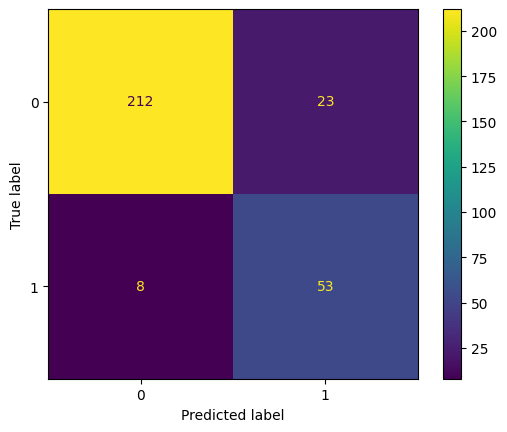

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

ConfusionMatrixDisplay.from_predictions(y_test, predicted_classes)

In [ ]:
print("Accuracy:", accuracy_score(y_test, predicted_classes))
print("Precision:", precision_score(y_test, predicted_classes))
print("Recall:", recall_score(y_test, predicted_classes))
print("F1 Score:", f1_score(y_test, predicted_classes))

Accuracy: 0.8952702702702703
Precision: 0.6973684210526315
Recall: 0.8688524590163934
F1 Score: 0.7737226277372263
